## Data Visualization with matplotlib

Python has a wide variety of useful packages for machine learning and statistical analysis such as *tensorflow*, *numpy*, *scikitlearn*, *pandas*, and more. One package that is essential to most data science projects is **matplotlib**.

Available for any Python distribution, it can be installed on Python 3 with pip. Other methods are also available, check [https://matplotlib.org/] for more details.

### Installation

If you use an OS with a terminal, the following command would install matplotlib with pip.

`python3 -m pip install matplotlib`

### Importing & Environment

In a Python file, we want to import the *pyplot* function that allows us to interface with a MATLAB-like plotting environment. We also import a *lines* function that lets us add lines to plots.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Essentially, this plotting environment lets us save figures and their attributes as variables. These plots can then be printed and viewed with a simple command. As an example, we can look at the stock price of Google: specifically the date, open, close, volume, and adjusted close price (date is stored as an *np.datetime64*). The data includes the most recent 250 trading days.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

We then transform the data in a way that is done quite often for time series, etc. We find the difference, $d_i$, between each observation and the one before it:

$$d_i = y_i - y_{i - 1} $$

In [12]:
delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

We can also look transformations of different variables, such as *volume* and *closing price*.

In [13]:
# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

### Plotting a Scatter Plot

To actually plot this data, you can use the *subplots()* functions from *plt* (matplotlib.pyplot). By default this generates the area for the figure and the axes of a plot.

Here we will make a scatter plot of the differences between successive days. To elaborate, *x* is the difference between day *i* and the previous day. *y* is the difference between day *i+1* and the previous day (*i*).

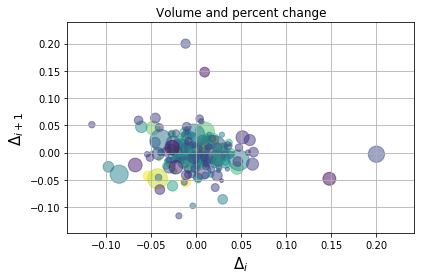

In [17]:
fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

We then create labels for the *x* and *y* axes, as well as a title for the plot. We choose to plot this data with grids and a tight layout. *plt.show()* displays the plot for us.

### Adding a Line

We can add a line to this plot by providing *x* and *y* coordinates as lists to a *Line2D* instance.

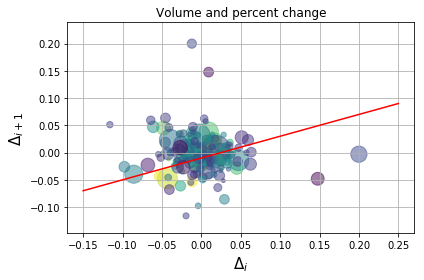

In [25]:
import matplotlib.lines as mlines
fig, ax = plt.subplots()
line = mlines.Line2D([-.15,0.25], [-.07,0.09], color='red')
ax.add_line(line)

#reusing scatterplot code
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

### Plotting Histograms

To plot a histogram, we follow a similar process and use the *hist()* function from *pyplot*. We will generate 10000 random data points, *x*, with a mean of 100 and standard deviation of 15.

The *hist* function takes the data, *x*, number of bins, *bins*, and other arguments such as *density*, which normalizes the data to a probability density, or *alpha*, which sets the transparency of the histogram.

We will also use the library *mlab* to add a line representing a normal density function with the same mean and standard deviation.

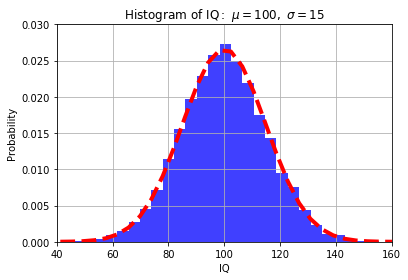

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 30, density=1, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=4)

plt.xlabel('IQ')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

### Bar Charts

While histograms helped us visual densities, bar charts help us view counts of data. To plot a bar chart with matplotlib, we use the *bar()* function. This takes the counts and data labels as *x* and *y*, along with other arguments.

As an example, we could look at a sample of the number of programmers that use different languages.

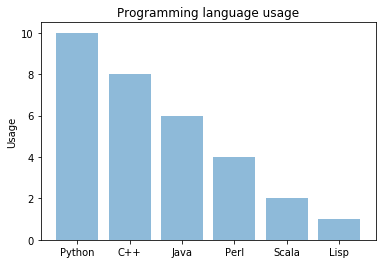

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

### Plotting Images

Analyzing images is very common in Python. Not surprisingly, we can use *matplotlib* to view images. We use the *cv2* library to read in images. 

The *read_image()* function below:
- reads in the image file, 
- splits the color channels, 
- changes them to RGB,
- resizes the image,
- returns a matrix of RGB values.

The rest of the code reads in the first five images of cats and dogs from data used in an image recognition CNN. The pictures are *concatenated* and printed on the same axis.

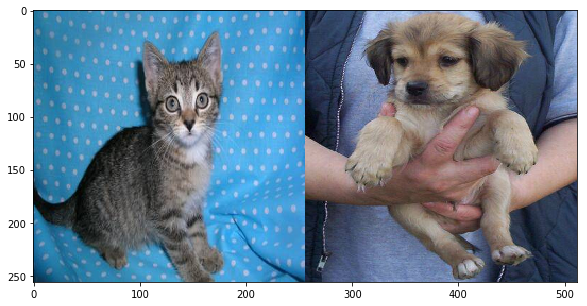

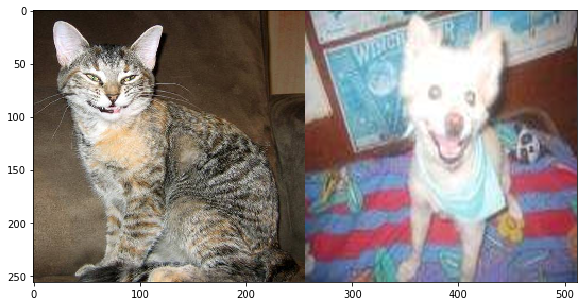

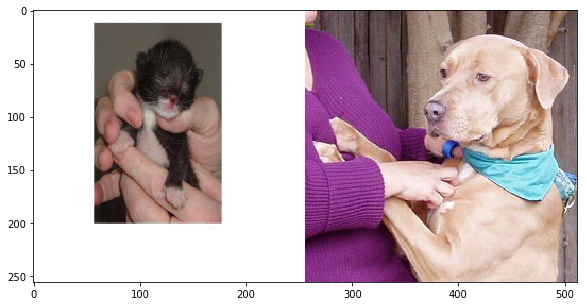

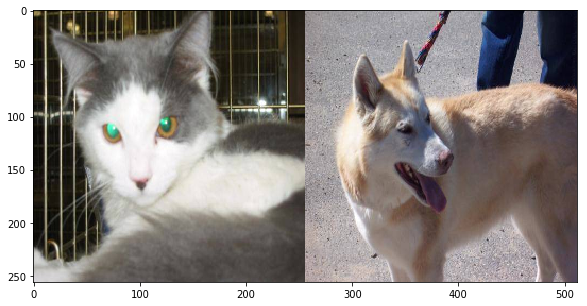

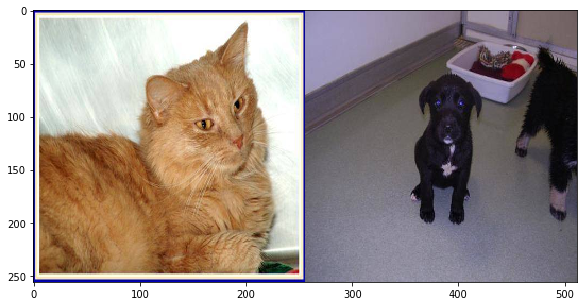

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os, cv2

cwd = os.getcwd()
TRAIN_DIR = cwd + '/data/train/'

ROWS = 256
COLS = 256
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    b,g,r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    return cv2.resize(img2, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

for a in range(0,5):
    cat = read_image(train_cats[a])
    dog = read_image(train_dogs[a])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()


### Conclusion

In this post we saw how to use *matplotlib* to plot data in scatter plots, histograms, and bar charts. We also added lines to these plots. Finally, we saw how to read in images using the *cv2* library and used *matplotlib* to plot the images.